# Read True and Fake CSV

In [1]:
import numpy as np
import pandas as pd

In [2]:
true_df = pd.read_csv('../data/True.csv')
true_df.head()  # 21417 rows × 4 columns

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake_df = pd.read_csv('../data/Fake.csv')
fake_df.head()  # 23481 rows × 4 columns

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Add Label Column and create concat dataframe

In [4]:
## Assign labels for the news type
true_df['news_type'] = 1 
fake_df['news_type'] = 0

In [5]:
## concate both dataframes
news_df = pd.concat([true_df,fake_df],ignore_index=True)
news_df = news_df.sample(frac=1).reset_index(drop=True)
train_df = news_df # for future use
train_df.head()  # 44898 rows × 5 columns

,title,text,subject,date,news_type
0,LAWLESS: MUSLIM VIOLENCE And Refusal To Assimi...,The European caliphate is in full swing First ...,Government News,"Oct 21, 2015",0
1,S.E. Cupp SLAMS Trump For His Attacks On The ...,"Throughout his entire presidential campaign, D...",News,"June 1, 2016",0
2,Anti-immigrant AfD alarms German Jews as elect...,"FRANKFURT/BERLIN (Reuters) - Salomea Genin, an...",worldnews,"September 20, 2017",1
3,Turkey orders arrest of 110 people over Gulen ...,ISTANBUL (Reuters) - Turkish authorities issue...,worldnews,"October 20, 2017",1
4,Venezuela Supreme Court has staged effective c...,GENEVA (Reuters) - Venezuela s Supreme Court h...,worldnews,"September 12, 2017",1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

final_labels = np.array(news_df['news_type'])

# Preprocess Text

In [6]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to C:\Users\Prutha
[nltk_data]     Modak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Prutha
[nltk_data]     Modak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Prutha
[nltk_data]     Modak\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Prutha
[nltk_data]     Modak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
news_df.iloc[0]['text']

'Earlier today, Donald Trump once again disgraced the United States by demonstrating his incompetence with empty threats to North Korea   via his Twitter account. Showcasing his inability to handle a crisis, Trump tweeted that he would meet with his military experts and could only say  we ll see  when he was asked about his plans to attack North Korea.Further proving that no one in his administration takes him seriously, Defense Secretary James Mattis was sent out to give a more powerful statement on North Korea, outshining his own boss  threats. In a statement, Mattis warned North Korea that the United States military would certainly respond to any threat. Mattis said: Any threat to the United States or its territories, including Guam, or our allies will be met with a massive military response, a response both effective and overwhelming. Mattis also urged North Korea to listen to the UN Security Council: All members unanimously agreed on the threat North Korea poses and they remain un

In [8]:
## Preprocess the Text

wordnet_lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # lower
    tokens = [w.lower() for w in tokens]
    
    # stemming
    stem_ls = [PorterStemmer().stem(w) for w in tokens]
    
    # lemmatization
    lemma_ls = [wordnet_lemma.lemmatize(w) for w in stem_ls]
    
    # remove punctuation
    stripped_ls = [w for w in lemma_ls if not w in string.punctuation]

    # remove tokens that are not alphabetic or numeric
    words = [word for word in stripped_ls if word.isalpha() or word.isnumeric()]
    
    # removing stopwords
    words = [w for w in words if not w in stop_words]
    
    return ' '.join(words)

preprocess_text(news_df.iloc[0]['text'])

'earlier today donald trump onc disgrac unit state demonstr hi incompet empti threat north korea via hi twitter account showcas hi inabl handl crisi trump tweet would meet hi militari expert could onli say see wa ask hi plan attack north prove one hi administr take serious defens secretari jame matti wa sent give power statement north korea outshin hi bos threat statement matti warn north korea unit state militari would certainli respond ani threat matti said ani threat unit state territori includ guam alli met massiv militari respons respons effect overwhelm matti also urg north korea listen un secur council member unanim agre threat north korea pose remain unanim commit denuclear korean peninsula look total annihil countri name north korea said mani option cours reason matti make thi statement first place becaus one believ word trump say even eight month hi presid trump ha manag destroy everi ounc credibl might mani task fall shoulder hi capabl administr member one take serious need 

In [9]:
%%time
news_df['text'] = news_df['text'].apply(preprocess_text)

Wall time: 7min 25s


In [10]:
news_df.head()

,title,text,subject,date,news_type
0,Defense Secretary Mattis Speaks Over Incompet...,earlier today donald trump onc disgrac unit st...,News,"September 3, 2017",0
1,NOT KIDDING: Why Government Is Forcing Manhatt...,thank govern land opportun ha taken whole new ...,politics,"Oct 14, 2015",0
2,Democratic Senator Schumer to Trump: Stop blam...,washington reuter senat democrat leader chuck ...,worldnews,"October 3, 2017",1
3,LIBERAL SMACK DOWN OF THE DAY: Watch What Happ...,left abl get away shame conserv easili past ou...,politics,"Sep 2, 2016",0
4,LIBERAL ELITIST SENATOR Says “Obamacare is NOT...,want wring thi guy neck claim obamacar hurt pe...,politics,"Jul 31, 2017",0


## WORDCLOUD for True News

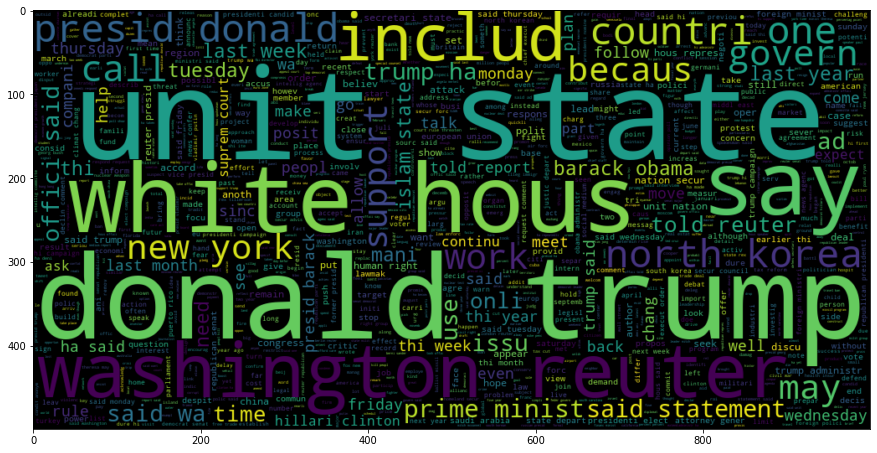

In [11]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,15))

wc_true = WordCloud(max_words = 2000, width=1000, height=500, stopwords= STOPWORDS).generate(' '.join(news_df[news_df['news_type']==1].text))
plt.imshow(wc_true, interpolation = 'bilinear')

## WORDCLOUD for Fake News

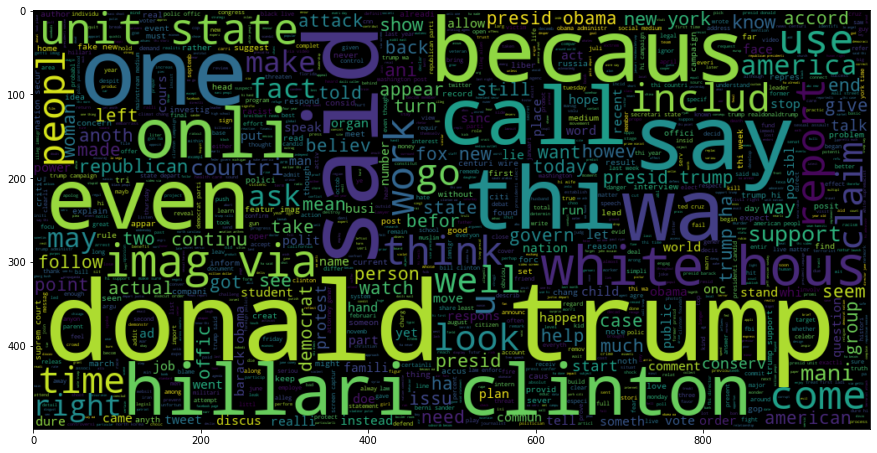

In [12]:
plt.figure(figsize=(15,15))

wc_fake = WordCloud(max_words = 2000, width=1000, height=500, stopwords= STOPWORDS).generate(' '.join(news_df[news_df['news_type']==0].text))
plt.imshow(wc_fake, interpolation = 'bilinear')

# Case 1 : Encoding words to numbers using Bag of Words with sklearn:SVM and sklearn:RandomForest Classifier

### Bag Of Words

In [13]:
%%time
from sklearn.feature_extraction.text import CountVectorizer

vectorize = CountVectorizer(max_features=200,ngram_range=(1,3))
data_1 = vectorize.fit_transform(news_df['text']).toarray()

print("Data Case 1 : \n",data_1)
print("Data Case 1 Shape : \n",data_1.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [3 0 0 ... 1 3 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 2 3 0]
 [0 3 0 ... 3 4 1]]
Data Case 1 Shape : 
 (44898, 200)
Label : 
 [0 1 0 ... 1 1 1]
Label Shape : 
 (44898,)
Wall time: 1min 1s


In [14]:
x_train, x_test, y_train, y_test = train_test_split(data_1,final_labels,test_size=0.2,random_state=777)

### sklearn : SVM Classifier

In [15]:
%%time
from sklearn.svm import LinearSVC

print("\nSVM Classifier : \n")
model_svc = LinearSVC().fit(x_train, y_train)
y_pred = model_svc.predict(x_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n\nClassification Report : \n", classification_report(y_test,y_pred))
print("\n\nAccuracy : ",model_svc.score(x_test,y_test))


SVM Classifier : 

Confusion Matrix : 
 [[4662   33]
 [  20 4265]]


Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4695
           1       0.99      1.00      0.99      4285

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Accuracy :  0.994097995545657
Wall time: 2.52 s


C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### sklearn : RandomForest Classifier

In [16]:
%%time
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=300,random_state=40).fit(x_train, y_train)
y_pred = model_rfc.predict(x_test)

print("\nRandomForestClassifier : \n")
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
print("\nAccuracy : ",model_rfc.score(x_test,y_test))


RandomForestClassifier : 

Confusion Matrix : 
 [[4682   13]
 [   9 4276]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4285

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Accuracy :  0.9975501113585746
Wall time: 19.8 s


# Case 2 : TF-IDF with XGBoost and LightGBM Classifier

### TF-TDF 

In [17]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, stop_words='english')
data_2 = tfidf.fit_transform(news_df['text'])

print("Data Case 2 : \n",data_2)
print("Data Case 2 Shape : \n",data_2.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 2 : 
   (0, 66619)	0.05787011940363621
  (0, 58132)	0.08639972880147588
  (0, 39960)	0.13922971282474558
  (0, 15337)	0.06654958536726441
  (0, 11707)	0.1071639266303661
  (0, 62408)	0.0846373491978039
  (0, 63545)	0.06726131727192303
  (0, 69694)	0.036068438621072424
  (0, 19547)	0.03990264678448988
  (0, 40130)	0.0569992519876698
  (0, 27094)	0.06240762271269037
  (0, 76190)	0.20099856436669594
  (0, 2491)	0.058596502054653714
  (0, 67974)	0.05367050020684415
  (0, 75879)	0.11546479649928398
  (0, 59059)	0.08339665037159895
  (0, 23531)	0.10326435559050984
  (0, 65328)	0.10922125344016353
  (0, 43034)	0.06544778880015084
  (0, 56863)	0.10060154637689238
  (0, 44479)	0.09270937996285722
  (0, 5700)	0.052869295299727365
  (0, 64094)	0.10903681877721906
  (0, 50747)	0.2727079140909278
  (0, 30032)	0.09635390362204976
  :	:
  (44897, 63538)	0.03868784170551909
  (44897, 6329)	0.03552933904888821
  (44897, 68341)	0.021571713339578642
  (44897, 73162)	0.12041483578381454
  (44897

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data_1,final_labels,test_size=0.2,random_state=777)

### XGBoost Classifier

In [19]:
%%time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_xgb = XGBClassifier(eval_metric='rmse', use_label_encode=False).fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)

print("\nXGBoost Classifier : \n")
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
print("\nAccuracy : ",accuracy_score(y_pred,y_test))

C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "use_label_encode" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



XGBoost Classifier : 

Confusion Matrix : 
 [[4683   12]
 [  10 4275]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4695
           1       1.00      1.00      1.00      4285

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


Accuracy :  0.9975501113585746
Wall time: 4.05 s


### LightGBM Classifier

In [20]:
%%time
from lightgbm import LGBMClassifier

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=777)

print("\nLightGBM Classifier : \n")
model_svc = LGBMClassifier(n_estimators = 300).fit(x_train, y_train, early_stopping_rounds=100, eval_metric='accuracy',eval_set=[(x_val,y_val)])
y_pred = model_svc.predict(x_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\n\nClassification Report : \n", classification_report(y_test,y_pred))
print("\n\nAccuracy : ",accuracy_score(y_pred,y_test))


LightGBM Classifier : 

[1]	valid_0's binary_logloss: 0.599299
[2]	valid_0's binary_logloss: 0.523195
[3]	valid_0's binary_logloss: 0.45987
[4]	valid_0's binary_logloss: 0.406249
[5]	valid_0's binary_logloss: 0.360564
[6]	valid_0's binary_logloss: 0.32119
[7]	valid_0's binary_logloss: 0.28719
[8]	valid_0's binary_logloss: 0.257382
[9]	valid_0's binary_logloss: 0.231276
[10]	valid_0's binary_logloss: 0.208467
[11]	valid_0's binary_logloss: 0.188247
[12]	valid_0's binary_logloss: 0.1705
[13]	valid_0's binary_logloss: 0.154699
[14]	valid_0's binary_logloss: 0.140686
[15]	valid_0's binary_logloss: 0.128192
[16]	valid_0's binary_logloss: 0.117046
[17]	valid_0's binary_logloss: 0.107196
[18]	valid_0's binary_logloss: 0.0983509
[19]	valid_0's binary_logloss: 0.0904027
[20]	valid_0's binary_logloss: 0.0832364
[21]	valid_0's binary_logloss: 0.0768132
[22]	valid_0's binary_logloss: 0.0711329
[23]	valid_0's binary_logloss: 0.0660773
[24]	valid_0's binary_logloss: 0.0614086
[25]	valid_0's binary_

C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.0391182
[32]	valid_0's binary_logloss: 0.0370575
[33]	valid_0's binary_logloss: 0.0351413
[34]	valid_0's binary_logloss: 0.0335293
[35]	valid_0's binary_logloss: 0.0320266
[36]	valid_0's binary_logloss: 0.030569
[37]	valid_0's binary_logloss: 0.0294023
[38]	valid_0's binary_logloss: 0.0283176
[39]	valid_0's binary_logloss: 0.0272894
[40]	valid_0's binary_logloss: 0.0263612
[41]	valid_0's binary_logloss: 0.0255743
[42]	valid_0's binary_logloss: 0.0247166
[43]	valid_0's binary_logloss: 0.0240793
[44]	valid_0's binary_logloss: 0.023431
[45]	valid_0's binary_logloss: 0.0226903
[46]	valid_0's binary_logloss: 0.0222532
[47]	valid_0's binary_logloss: 0.0218276
[48]	valid_0's binary_logloss: 0.0212366
[49]	valid_0's binary_logloss: 0.0208947
[50]	valid_0's binary_logloss: 0.0205393
[51]	valid_0's binary_logloss: 0.0201176
[52]	valid_0's binary_logloss: 0.0197976
[53]	valid_0's binary_logloss: 0.0195418
[54]	valid_0's binary_logloss: 0.0191718
[55]	valid_0's bin

# Case 3 :  Pre-trained GloVe Embedding and Tensorflow LSTM

In [11]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

### Tokenization, Padding

In [15]:
%%time
# Tokenization : Representing each word by a vector
from tensorflow.keras.preprocessing import text, sequence

max_features = 10000
maxlen = 300 # keep all text to 300, add padding for text len < 300 and truncating long ones

X = news_df['text'].values
tokenizer = text.Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
data_3 = sequence.pad_sequences(X,maxlen=maxlen)

print("Data Case 3 : \n",data_3)
print("Data Case 3 Shape : \n",data_3.shape)

print("Label : \n",final_labels)
print("Label Shape : \n",final_labels.shape)

Data Case 3 : 
 [[   0    0    0 ...  121 1553   89]
 [   0    0    0 ...  410  121 4594]
 [   0    0    0 ... 1740   36   21]
 ...
 [   0    0    0 ... 3643 4888 3026]
 [   0    0    0 ...  121 4660   89]
 [   0    0    0 ... 1070 1693   89]]
Data Case 3 Shape : 
 (44898, 300)
Label : 
 [0 0 1 ... 1 0 0]
Label Shape : 
 (44898,)
Wall time: 8.66 s


### Introducing GloVe Embedding and creating Embedding Matrix

In [16]:
%%time

Embedding_file ='../../glove.twitter.27B.100d.txt'

def get_coeffs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embed_id = dict(get_coeffs(*o.rstrip().rsplit(' ')) for o in open(Embedding_file, encoding="utf8"))

embeds = np.stack(embed_id.values())
emb_mean, emb_std = embeds.mean(), embeds.std()
embeds_len = embeds.shape[1]

word_index = tokenizer.word_index # mapping of original word to number
nb_words = min(max_features, len(word_index))

embed_mat = np.random.normal(emb_mean, emb_std, (nb_words, embeds_len))
for word, i in word_index.items():
    if i >= max_features: continue
    embed_vec = embed_id.get(word)
    if embed_vec is not None: embed_mat[i] = embed_vec
        
print("Embedding Matrix : \n",embed_mat)
print("Embedding Matrix size : ",embed_mat.shape)

### Reference : https://www.kaggle.com/madz2000/nlp-using-glove-embeddings-99-87-accuracy --- to understand glove embedding

C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\IPython\core\magic.py:187: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  call = lambda f, *a, **k: f(*a, **k)


Embedding Matrix : 
 [[ 0.97833068  0.4766809  -0.05735895 ... -0.19571336 -0.13408469
  -0.49086087]
 [ 0.64024001  0.77112001  0.32822999 ... -0.41058001  0.53272003
  -0.01706   ]
 [-0.24645001  0.45247999  0.83719999 ... -0.98967999 -0.25141001
  -0.54979002]
 ...
 [ 0.41962001 -0.19794001 -0.80325001 ... -0.072348    0.40298
  -0.49430001]
 [-0.24556001  0.10497     0.31205001 ... -0.040448   -0.39070001
   0.14      ]
 [ 0.06102945 -0.90291136  1.24692517 ...  0.09612832  0.34599703
  -0.96246939]]
Embedding Matrix size :  (10000, 100)
Wall time: 29 s


### Build Model BiLSTM

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, Input, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Masking, Bidirectional, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

optimizer=optimizers.Adam(clipnorm=0.25,lr=0.0005)

def BiLSTM_Model():
    model = Sequential([
    Embedding(max_features, output_dim = embeds_len, weights = [embed_mat], input_length=maxlen, trainable=False),
    Bidirectional(LSTM(64,return_sequences=True,recurrent_regularizer=l2(2e-4))),
    Dropout(0.1),
    Bidirectional(LSTM(32,recurrent_regularizer=l2(2e-4),return_sequences=False)),
    Dense(16,activation='relu'),
    Dense(1,kernel_regularizer=l1_l2(1e-4, 2e-4),activation='sigmoid')
    ])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model


model_bilstm = BiLSTM_Model()
model_bilstm.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 300, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 1

### Train Model

In [20]:
x_train,x_test,y_train,y_test = train_test_split(data_3,final_labels,test_size=0.2,random_state = 777)
epochs = 10
batch_size = 128

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state = 777)

history = model_bilstm.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_val,y_val) , epochs = epochs , callbacks = [early_stopping])

Epoch 1/10
225/225 [==============================] - 29s 96ms/step - loss: 0.3187 - accuracy: 0.8792 - val_loss: 0.1849 - val_accuracy: 0.9467
Epoch 2/10
225/225 [==============================] - 21s 94ms/step - loss: 0.1644 - accuracy: 0.9516 - val_loss: 0.1474 - val_accuracy: 0.9516
Epoch 3/10
225/225 [==============================] - 22s 100ms/step - loss: 0.1200 - accuracy: 0.9676 - val_loss: 0.1037 - val_accuracy: 0.9745
Epoch 4/10
225/225 [==============================] - 22s 98ms/step - loss: 0.0872 - accuracy: 0.9790 - val_loss: 0.0836 - val_accuracy: 0.9800
Epoch 5/10
225/225 [==============================] - 22s 98ms/step - loss: 0.0769 - accuracy: 0.9806 - val_loss: 0.0910 - val_accuracy: 0.9770
Epoch 6/10
225/225 [==============================] - 22s 97ms/step - loss: 0.0634 - accuracy: 0.9851 - val_loss: 0.0692 - val_accuracy: 0.9839
Epoch 7/10
225/225 [==============================] - 22s 98ms/step - loss: 0.0546 - accuracy: 0.9870 - val_loss: 0.0538 - val_accuracy

### Evaluate Model

In [23]:
loss,acc = model_bilstm.evaluate(x_test,y_test)

print("\n\nTest Data Loss : ",loss*100)
print("\nTest Data Accuracy : ",acc*100)

y_pred = (model_bilstm.predict(x_test) > 0.5).astype("int32")

print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))

281/281 [==============================] - 9s 33ms/step - loss: 0.0421 - accuracy: 0.9908


Test Data Loss :  4.211357980966568

Test Data Accuracy :  99.07572269439697

Confusion Matrix : 
 [[4655   39]
 [  44 4242]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4694
           1       0.99      0.99      0.99      4286

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Case 4 : BERT and RoBERTa

In [7]:
import torch

is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
print(device)

cuda


### Initialize Pretrained Models of BERT and RoBERTa

In [8]:
%%time
### Initialize Pretrained Models of BERT and RoBERTa

sentences = train_df['text'].values

from transformers import BertForSequenceClassification, BertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, AdamW

model_bert = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2,output_attentions=False,output_hidden_states=False)
# 'bert-base-uncased' : 12 layer BERT model with uncased vocab
# num_labels : 2 labels for binary classification
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert.cuda()

print("\n\nBERT Model : \n\n",model_bert)

model_roberta = RobertaForSequenceClassification.from_pretrained('roberta-base',num_labels=2,output_attentions=False,output_hidden_states=False)
# 'roberta-base' : 12 layer, 768 hidden, 12 heads, 125M params RoBERTa using BERT-base architecture
tokenizer_roberta = RobertaTokenizer.from_pretrained('roberta-base')
model_roberta.cuda()

print("\n\nRoBERTa Model : \n\n",model_roberta)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at



BERT Model : 

 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), 

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie



RoBERTa Model : 

 RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)


### Tokenization : encode_plus method from tokenizer_bert and tokenizer_roberta 

In [9]:
%%time
### Tokenization : encode_plus method from tokenizer_bert and tokenizer_roberta

# encode plus : tokenize sentence, prepand [CLS] to start, append [SEP] to end, 
# map token to their ID, Pad or truncate the sentence to max_len, create attention masks for [PAD] tokens

inputID_bert = []
attentionMask_bert = []

inputID_roberta = []
attentionMask_roberta = []

sentenceID = []
count = 0

for text in sentences:
    
    enc_dict_bert = tokenizer_bert.encode_plus(text,add_special_tokens=True,max_length=120,pad_to_max_length=True, return_attention_mask=True,return_tensors='pt')
    enc_dict_roberta = tokenizer_roberta.encode_plus(text,add_special_tokens=True,max_length=120,pad_to_max_length=True, return_attention_mask=True,return_tensors='pt')
    
    # max_length : Pad and truncate all texts
    # return_attention_mask : construct attention masks
    # return_tensors : 'pt' : pytorch tensor
    
    inputID_bert.append(enc_dict_bert['input_ids'])
    inputID_roberta.append(enc_dict_roberta['input_ids']) # added encoded text as ID to the list
    
    attentionMask_bert.append(enc_dict_bert['attention_mask']) # added attention mask to the list
    attentionMask_roberta.append(enc_dict_roberta['attention_mask']) # that simply differs padding from non-padding

    sentenceID.append(count)
    count = count + 1
    
# convert lists to tensor

inputID_bert = torch.cat(inputID_bert,dim=0)
inputID_roberta = torch.cat(inputID_roberta,dim=0)
attentionMask_bert = torch.cat(attentionMask_bert,dim=0)
attentionMask_roberta = torch.cat(attentionMask_roberta,dim=0)

labels = torch.tensor(final_labels)
sentenceID = torch.tensor(sentenceID)

print('\nOriginal: \n', sentences[0])
print('\nToken IDs BERT: \n', inputID_bert[0])
print('\nToken IDs RoBERTa: \n', inputID_roberta[0])

### Reference : https://www.kaggle.com/jaskaransingh/fake-news-classification-bert-roberta --- for tokenization

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Prutha\Softwares\anaconda3\envs\vdl\lib\site-packages\transformers\tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific va


Original: 
 The European caliphate is in full swing First and foremost, it must be made clear that not all  No-Go  zones should be exclusively defined as  areas populated by Islamic radicals.  Breitbart News has found that in several areas throughout Europe places officially or unofficially deemed  no-go  zones often have largely unassimilated Islamic populations where the host country s laws are difficult, if not impossible, to enforce.The French government has listed 750 areas determined to be  Sensitive Urban Zones (Zones Urbaine Sensibles, or ZUS).  ZUS areas tend to have high crime, low unemployment, and drug trafficking/black market issues. While these areas fall under one big umbrella category, a Gatestone Institute report has found that the majority of France s Islamic population lives in the Sensitive Urban Zones. Gatestone has found several local reporters and individuals whose testimony indicates that the areas remain places where law enforcement cannot sufficiently do its 

### Create DataSet and DataLoader

In [10]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Remove sentence id from TensorDataset after train validation test split
def sid_remove_from_tensordataset(datatensor): 
    
    inputID = []
    attentionMask = []
    label = []
    
    for sid,iid,amask,l in datatensor:
        inputID.append(iid.tolist())
        attentionMask.append(amask.tolist())
        label.append(l.tolist())
    
    inputID = torch.tensor(inputID)
    attentionMask = torch.tensor(attentionMask)
    label = torch.tensor(label)
    
    return TensorDataset(inputID,attentionMask,label)
    
# Get DataSetLoaders
def get_loaders(dataset,batch_size,b):

    """
    return the train, validation and test set loaders
    """  
    #dataset = torch.utils.data.TensorDataset(data_tr, labels_tr)
    train_size = int(0.8 * len(dataset))
    val_size = int(0.1 * len(dataset))
    test_size = len(dataset) - train_size - val_size
    #print("\nTrain DataSet Size :",train_size)
    #print("\nValidation DataSet Size :",val_size)
    #print("\nTest DataSet Size :",test_size)
    train_dataset, validation_dataset,test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])
    
    if(b==1): # sid remove only in BERT model : b=1
        train_dataset = sid_remove_from_tensordataset(train_dataset)
        validation_dataset = sid_remove_from_tensordataset(validation_dataset)
        test_dataset = sid_remove_from_tensordataset(test_dataset)

    train_loader = DataLoader(train_dataset, batch_size=batch_size,sampler=RandomSampler(train_dataset))
    valid_loader = DataLoader(validation_dataset, batch_size=batch_size,sampler=SequentialSampler(validation_dataset))    
    test_loader = DataLoader(test_dataset, batch_size=batch_size,sampler=SequentialSampler(test_dataset))

    return train_loader, valid_loader, test_loader


### Train and Evaluate Model

In [11]:
def get_accuracy(y_pred, y_test):
    y_pred_flat = np.argmax(y_pred, axis=1).flatten()
    y_test_flat = y_test.flatten()
    return np.sum(y_pred_flat == y_test_flat) / len(y_test_flat)

In [12]:
def train_model(model, optimizer, train_loader):
  
    model.train()

    epoch_loss = 0
    epoch_acc = 0

    for iid, amask, labels in train_loader:
        
        iid, amask, labels = iid.to(device), amask.to(device), labels.to(device)
        model.zero_grad()
        loss,outputs = model(iid,token_type_ids=None, attention_mask=amask,labels=labels, return_dict=False)  
        #torch.set_default_tensor_type(torch.FloatTensor)
        
        #x = torch.tensor(x, dtype=torch.float32)
        #labels=torch.tensor(labels, dtype= torch.float32)
        #loss = criterion(outputs, labels)
        #loss = criterion(outputs.squeeze(), labels.float32)
        epoch_loss += loss.item()
        loss.backward()
        #nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        epoch_acc += get_accuracy(outputs.detach().cpu().numpy(),labels.to('cpu').numpy())

    train_loss =  epoch_loss / len(train_loader)
    train_acc = epoch_acc / len(train_loader)  
    return train_loss, train_acc

In [13]:
def evaluate_model(model, loader):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    y_true=[]
    y_pred=[]
    
    with torch.no_grad():
    
        for iid, amask, labels in loader:
            iid, amask, labels = iid.to(device), amask.to(device), labels.to(device)

            loss,outputs = model(iid,token_type_ids=None, attention_mask=amask, labels=labels, return_dict=False)
            #torch.set_default_tensor_type(torch.FloatTensor)
            labels=torch.tensor(labels, dtype= torch.float32)
            
            #e_loss = criterion(outputs.squeeze(), labels.float32)
            #e_loss = criterion(outputs,labels)
            epoch_loss += loss.item()
            
            epoch_acc += get_accuracy(outputs.detach().cpu().numpy(),labels.to('cpu').numpy())
           
            y_true.append(labels.to('cpu').numpy())
            y_pred.append(outputs.detach().cpu().numpy())
            
        
    loss =  epoch_loss / len(loader)
    acc = epoch_acc / len(loader)  
    return loss, acc, y_pred, y_true

### Run Model

In [14]:
def run_model(model, train_loader, validate_loader, test_loader, epochs, batch_size, optimizer):
   
    for epoch in range(epochs):
        train_loss, train_acc = train_model(model, optimizer, train_loader)
        valid_loss, valid_acc, _, _ = evaluate_model(model, validate_loader)

        print(f'Epoch: {epoch+1:02}')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    ##Evaluate the test accuracy

    test_loss, test_acc, y_pred, y_true = evaluate_model(model, test_loader)
    print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')
    
    flat_pred = np.concatenate(y_pred,axis=0)
    flat_pred = np.argmax(flat_pred,axis=1).flatten()
    flat_true = np.concatenate(y_true, axis=0)
    print("\nConfusion Matrix : \n",confusion_matrix(flat_true,flat_pred))
    print("\nClassification Report : \n", classification_report(flat_true,flat_pred))
    
NUM_EPOCHS = 1
batch_size = 20

In [15]:
%%time

# RUN BERT Model
print("\n\nBERT Model :\n")
dataset_bert = TensorDataset(sentenceID, inputID_bert, attentionMask_bert, labels)
train_loader_bert, validation_loader_bert, test_loader_bert = get_loaders(dataset_bert, batch_size, 1)
optimizer_bert = AdamW(model_bert.parameters(),lr=5e-5,eps=1e-8)

run_model(model_bert, train_loader_bert, validation_loader_bert, test_loader_bert, NUM_EPOCHS, batch_size, optimizer_bert)



BERT Model :



C:\Users\PRUTHA~1\AppData\Local\Temp/ipykernel_67748/1125999774.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels=torch.tensor(labels, dtype= torch.float32)


Epoch: 01
	Train Loss: 0.012 | Train Acc: 99.73%
	 Val. Loss: 0.008 |  Val. Acc: 99.87%

Test Loss: 0.007 | Test Acc: 99.91%

Confusion Matrix : 
 [[2371    0]
 [   4 2116]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2371
         1.0       1.00      1.00      1.00      2120

    accuracy                           1.00      4491
   macro avg       1.00      1.00      1.00      4491
weighted avg       1.00      1.00      1.00      4491

Wall time: 15min 29s


In [15]:
%%time

# RUN RoBERTa Model
print("\n\nRoBERTa Model :\n")
dataset_roberta = TensorDataset(inputID_roberta, attentionMask_roberta, labels)
train_loader_roberta, validation_loader_roberta, test_loader_roberta = get_loaders(dataset_roberta, batch_size, 0)
optimizer_roberta = AdamW(model_roberta.parameters(),lr=5e-5,eps=1e-8)

run_model(model_roberta, train_loader_roberta, validation_loader_roberta, test_loader_roberta, NUM_EPOCHS, batch_size, optimizer_roberta)



RoBERTa Model :



C:\Users\PRUTHA~1\AppData\Local\Temp/ipykernel_72980/1125999774.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels=torch.tensor(labels, dtype= torch.float32)


Epoch: 01
	Train Loss: 0.033 | Train Acc: 99.23%
	 Val. Loss: 0.006 |  Val. Acc: 99.93%

Test Loss: 0.007 | Test Acc: 99.91%

Confusion Matrix : 
 [[2340    3]
 [   1 2147]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2343
         1.0       1.00      1.00      1.00      2148

    accuracy                           1.00      4491
   macro avg       1.00      1.00      1.00      4491
weighted avg       1.00      1.00      1.00      4491

Wall time: 15min 42s


# Summary

Case 1 : 
Bag of Words : Set of vectors containing count of word occurences, a simple and flexible approach in Text Classification.
Sklearn Library : SVM and RandomForest : Optimal Classifiers for Binary Classification.

Case 2 :
TF-IDF : It assigns a value to a term according to its importance in the text scaled by its importance across all the texts in the data. A popular approach in NLP.
XGBoost and LightGBM : Both are based on Gradient Boosted Decision Trees. In XGBoost, trees grow depth-wise and in LightGBM, trees grow leaf-wise. Both models had great success in enterprise applications and data science competitions. XGBoost is extremely powerful, though model training is faster in LightGBM.

Case 3 :
Pre-trained GloVe Embedding : GloVe = Global vectors for word representation. It is an unsupervised algorithm developed by Standford for generating word embeddings by aggregating global word-word co-occurence matrix from a corpus, which gives semantic relationships between words. Here, I have user Pretrained Word Vector of Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors, 1.42 GB) from https://nlp.stanford.edu/projects/glove/
Tensorflow Framework : Bi-Directional LSTM : LSTM is classic model used for NLP tasks

Case 4 :
PyTorch Framework : HuggingFace transformers Library
BERT : Google's BERT (October-2018) is the transformer based method for NLP, outperforming state-of-the-art on several tasks such as QnA, language inference. It is a pre-trained deep Bi-directional Encoder Representation from transformer with Masked Language Modelling (MLM) and Next Sentence Prediction (NSP).
RoBERTa : Facebook's RoBERTa (July-2019), robustly optimized BERT approach, advancing the state-of-the-art in self-supervised systems. It is a BERT without Next Sentence Prediction (NSP). To improve training procedure, RoBERTa removes the Next Sentence Prediction (NSP) task from BERT's pre-training and dynamic masking so that the masked token changes during training epochs.

The Most Preferred Model : From these 4 cases, currently the RoBERTa model is the most preferred one, as it is the optimized BERT approach.